In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans


In [40]:
# Step 2: Loading Dataset

iris = pd.read_csv('./Iris.csv')

In [41]:
# Checking the first few records in the dataset
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
# Checking the shape of the dataset
iris.shape


(150, 6)

In [43]:
# Checking the column names in the dataset
iris.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [44]:
# Step 3: Data cleaning and pre-processing

# Checking the information about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [45]:
# Getting descriptive statistics of the dataset
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [46]:
# Checking for missing values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [47]:
# Dropping the 'Species' column as it is the target variable
iris1 = iris.drop(['Species'], axis=1)


In [48]:
# Dropping the 'Id' column as it is not relevant for clustering
iris1 = iris1.drop('Id', axis=1)

<Axes: >

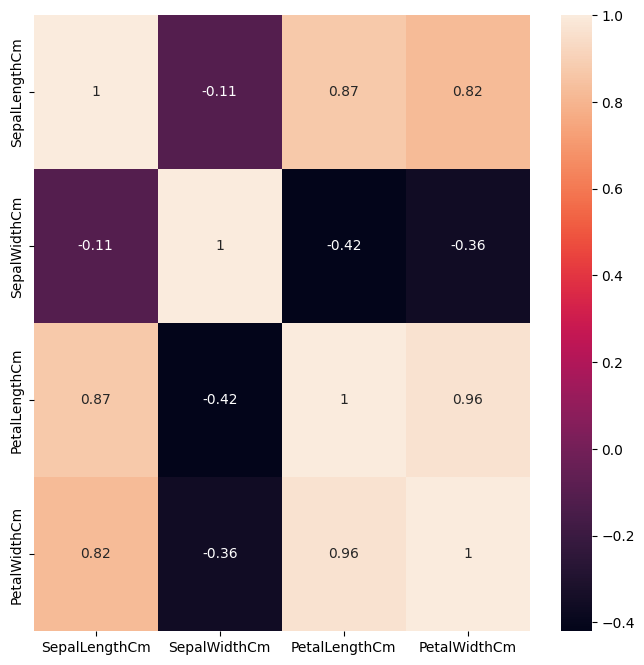

In [49]:
# Step 4: K-means Clustering

# Checking the correlation between variables
corr = iris1.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True)


In [51]:
# Finding the optimum number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(iris1)
    wcss.append(kmeans.inertia_)

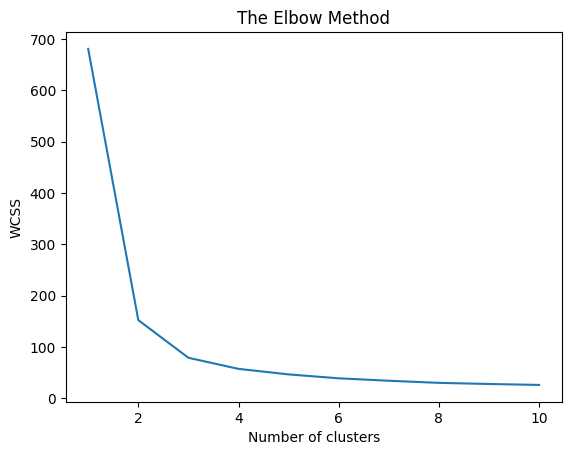

In [52]:
# Plotting the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [53]:
# Fitting K-means clustering with the optimal number of clusters
model = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
model.fit(iris1)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [54]:
# Getting the cluster predictions for the dataset
predictions = model.predict(iris1)


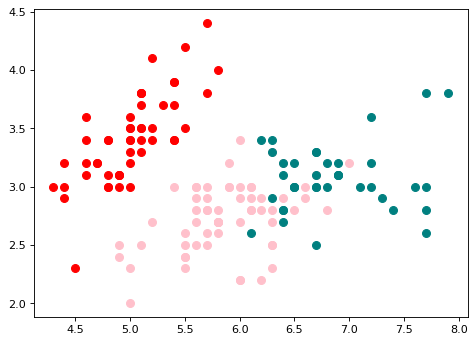

In [57]:
x = iris1.iloc[:, [0, 1, 2, 3]].values
plt.figure(figsize=(7, 5), dpi=80)
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s=50, c='pink', label='Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s=50, c='red', label='Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s=50, c='teal', label='Iris-virginica')


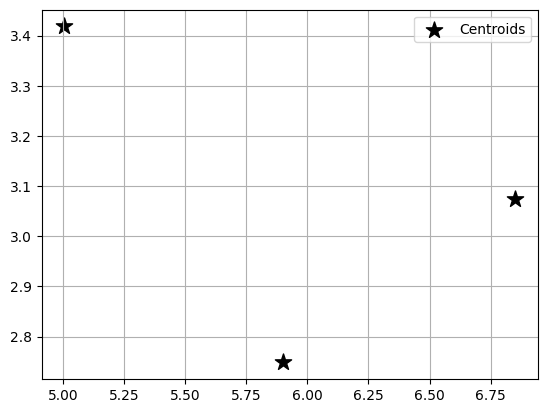

In [56]:
# Plotting the cluster centers
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=150, c='black', label='Centroids', marker="*")
plt.legend()
plt.grid()
plt.show()